# 匯入Tensorflow套件

In [1]:
import tensorflow
if tensorflow.__version__.startswith('1.'):
    import tensorflow as tf
    from tensorflow.python.platform import gfile
else:
    import tensorflow as v2
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    import tensorflow.compat.v1.gfile as gfile
print("Tensorflow version:{}".format(tf.__version__))

Instructions for updating:
non-resource variables are not supported in the long term
Tensorflow version:2.5.0


# 匯入其他套件

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

# 匯入資料集mnist

In [25]:
 (img_train, label_train), (img_test, label_test) = tf.keras.datasets.mnist.load_data()

# 查看資料集的type, shape, dtype訊息

In [26]:
print("img_train type:",type(img_train))
print("img_train shape:",img_train.shape)
print("img_train dtype:",img_train.dtype)
print("label_train type:",type(label_train))
print("label_train shape:",label_train.shape)
print("label_train dtype:",label_train.dtype)

img_train type: <class 'numpy.ndarray'>
img_train shape: (60000, 28, 28)
img_train dtype: uint8
label_train type: <class 'numpy.ndarray'>
label_train shape: (60000,)
label_train dtype: uint8


# 圖片顯示函數

In [27]:
def image_random_show(img_data,label_data,label2classname_dict,row=3,column=3):
    a = np.array([1])
    random_list = np.random.randint(0,img_data.shape[0], int(row * column))                           
    print("random_list:",random_list)
    
    #----設定圖片大小
    plt.figure(figsize=(7,7))
    #----display
    for i, rdm_number in enumerate(random_list):
        label = label_data[rdm_number]
        if type(label) == type(a):
            label = label[0]
        classname = label2classname_dict[label]

        plt.subplot(column,row,i+1)
        plt.axis('off')
        plt.title("{}".format(classname))
        
        if img_data.ndim == 3:
             plt.imshow(img_data[rdm_number],cmap='gray')
        else:
            plt.imshow(img_data[rdm_number])

    plt.show()

# 建立label轉換成類別名稱的字典集

In [28]:
label2classname_dict = {0:'zero',
                        1:"one",
                        2:"two",
                        3:"three",
                        4:"four",
                        5:"five",
                        6:"six",
                        7:"seven",
                        8:'eight',
                        9:"nine"}

random_list: [57404 32944  6807  3932 56763 38173 44133  5271 58111]


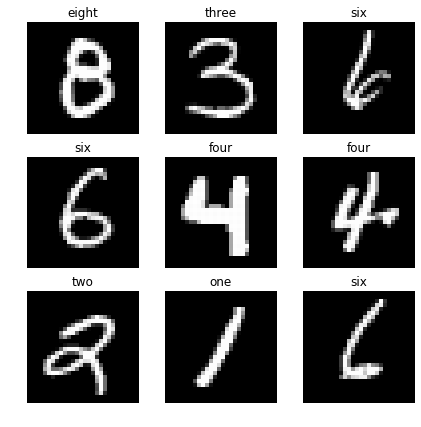

In [29]:
image_random_show(img_train,label_train,label2classname_dict=label2classname_dict,row=3,column=3)

random_list: [1297 8704 8303 1176 4989 1561 6446 9331 3027]


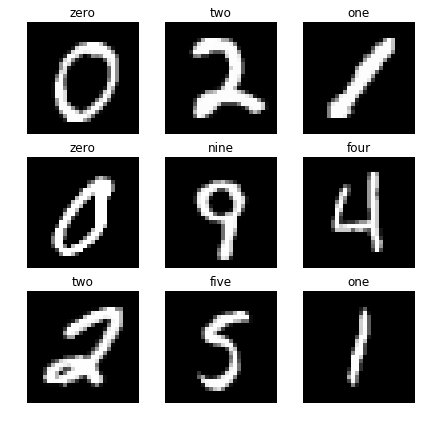

In [30]:
image_random_show(img_test,label_test,label2classname_dict=label2classname_dict,row=3,column=3)

# 建立計算圖_1

In [40]:
graph_1 = tf.Graph()
with graph_1.as_default():
    #----建立tf.placeholder()，接收非張量型態的資料
    tf_input = tf.placeholder(tf.float32,shape=[None,28,28],name='input')
    tf_label = tf.placeholder(tf.int32,shape=[None],name="label")
    
    #----建立類神經網路
    net = tf.layers.flatten(tf_input)
    print(net.shape)
    net = tf.layers.dense(inputs=net, units=100, activation=tf.nn.relu)
    print(net.shape)
    output = tf.layers.dense(inputs=net, units=10, activation=None)#輸出層就不需使用激勵函數
    print(output.shape)

    #----softmax函數輸出各類別的機率
    tf_prediction = tf.nn.softmax(output,name="prediction")

     #----設定損失函數
    tf_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf_label,logits=output),
                      name="loss")

    #----設定最佳化函數
    learning_rate = 1e-4
    tf_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(tf_loss)

    #----GPU 資源設定
    config = tf.ConfigProto(log_device_placement=True,
                            allow_soft_placement=True)
    config.gpu_options.allow_growth = True

    sess = tf.Session(graph=graph_1,config=config)
    sess.run(tf.global_variables_initializer())

(?, 784)
(?, 100)
(?, 10)
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



# #建立計算圖_2

In [44]:
graph_2 = tf.Graph()
with graph_2.as_default():
    
    #----建立tf.placeholder()，接收非張量型態的資料
    tf_input = tf.placeholder(tf.float32,shape=[None,28,28],name='input')
    tf_label = tf.placeholder(tf.int32,shape=[None],name="label")
    tf_keep_prob = tf.placeholder(tf.float32,name='keep_prob')
    
    #----建立類神經網路
    net = tf.layers.flatten(tf_input)
    print(net.shape)
    net = tf.layers.dense(inputs=net, units=512, activation=tf.nn.relu)
    print(net.shape)
    net = tf.layers.dense(inputs=net, units=1024, activation=tf.nn.relu)
    print(net.shape)
    
    net = tf.nn.dropout(net, keep_prob=tf_keep_prob)#加入dropout
    
    output = tf.layers.dense(inputs=net, units=10, activation=None)#輸出層就不需使用激勵函數
    print(output.shape)

    #----softmax函數輸出各類別的機率
    tf_prediction = tf.nn.softmax(output,name="prediction")

     #----設定損失函數
    tf_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf_label,logits=output),
                      name="loss")

    #----設定最佳化函數
    learning_rate = 1e-4
    tf_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(tf_loss)

    #----GPU 資源設定
    config = tf.ConfigProto(log_device_placement=True,
                            allow_soft_placement=True)
    config.gpu_options.allow_growth = True

    sess = tf.Session(graph=graph_2,config=config)
    sess.run(tf.global_variables_initializer())

(?, 784)
(?, 512)
(?, 1024)
(?, 10)
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



# 計算訓練的參數數量

In [20]:
def get_qty_var(tf_graph):
    qty = 0
    with tf_graph.as_default():
        for var in tf.global_variables():
            
            if var.trainable:
                shape = var.shape
                for i,num in enumerate(shape):
                    if i == 0:
                        product = num
                    else:
                        product *= num
                qty += product 

        print("參數數量 = ",qty)

In [21]:
get_qty_var(graph_1)
get_qty_var(graph_2)

參數數量 =  79510
參數數量 =  937482


# 選取迭代資料函數

In [11]:
def get_ite_data(img_data,label_data,ite_num,batch_size):
    num_start = batch_size * ite_num
    num_end = num_start + batch_size
    if num_end > img_data.shape[0]:
        num_end = img_data.shape[0]
    
    ite_data = img_data[num_start:num_end]
    ite_label = label_data[num_start:num_end]
    
    return ite_data,ite_label

# 計算損失值函數

In [12]:
def get_loss(img_data,label_data,batch_size,sess,use_dropout=False):
    iterations =math.ceil(img_data.shape[0] / batch_size)
    loss = 0
    
    for iteration in range(iterations):
        ite_data,ite_label = get_ite_data(img_data,label_data,iteration,batch_size)
        
        if use_dropout is False:
            loss += sess.run(tf_loss,feed_dict={tf_input:ite_data,tf_label:ite_label})
        else:
            loss += sess.run(tf_loss,feed_dict={tf_input:ite_data,
                                                tf_label:ite_label,
                                                tf_keep_prob:1})
    
    loss /= iterations
    
    return loss

# 計算準確率函數

In [16]:
def get_accuracy(img_data,label_data,batch_size,sess,use_dropout=False):
    iterations = math.ceil(img_data.shape[0] / batch_size)
    correct_count = 0
    prediction_count = 0
    
    for iteration in range(iterations):
        ite_data,ite_label = get_ite_data(img_data,label_data,iteration,batch_size)
        if use_dropout is False:
            predictions = sess.run(tf_prediction,feed_dict={tf_input:ite_data})
        else:
            predictions = sess.run(tf_prediction,feed_dict={tf_input:ite_data,
                                                tf_label:ite_label,
                                                tf_keep_prob:1})
        arg_predictions = np.argmax(predictions,axis=1)
        for arg_prediction, label in zip(arg_predictions,ite_label):
            prediction_count += 1
            if arg_prediction == label:
                correct_count += 1
    acc = correct_count / prediction_count
    
    return acc

# 訓練程式碼函數

In [37]:
def run_training(*args,**kwargs):
    #----參數擷取
    img_train = args[0]
    label_train = args[1]
    img_test = args[2]
    label_test = args[3]
    sess = args[4]
    batch_size = kwargs['batch_size']
    epochs = kwargs['epochs']
    dropout_ratio = kwargs.get('dropout_ratio')
    
    #----計算迭代次數
    iterations_train =math.ceil(img_train.shape[0] / batch_size)
    iterations_test = math.ceil(img_test.shape[0] / batch_size )
    
    #----宣告收集損失值與準確率的串列
    loss_train_list = list()
    acc_train_list = list()
    loss_test_list = list()
    acc_test_list = list()
    
    for epoch in range(epochs):
        for iteration in range(iterations_train):
            ite_data,ite_label = get_ite_data(img_train,label_train,iteration,batch_size)
            if dropout_ratio is None:
                sess.run(tf_optimizer,feed_dict={tf_input:ite_data,tf_label:ite_label})
            else:
                sess.run(tf_optimizer,feed_dict={tf_input:ite_data,
                                                 tf_label:ite_label,
                                                 tf_keep_prob:1-dropout_ratio})
        
        #----計算訓練集的損失值與準確率
        if dropout_ratio is None:
            loss_train = get_loss(img_train,label_train,batch_size,sess)
            acc_train = get_accuracy(img_train,label_train,batch_size,sess)
        else:
            loss_train = get_loss(img_train,
                                  label_train,
                                  batch_size,sess,
                                  use_dropout=True)
            acc_train = get_accuracy(img_train,
                                     label_train,
                                     batch_size,sess,
                                     use_dropout=True)
        print("訓練集 損失值 = ",loss_train)
        print("訓練集 準確率 = ",acc_train)

        #----收集訓練集損失值與準確率數值至串列
        loss_train_list.append(loss_train)
        acc_train_list.append(acc_train)

        #----計算驗證集的損失值與準確率
        if dropout_ratio is None:
            loss_test = get_loss(img_test,label_test,batch_size,sess)
            acc_test = get_accuracy(img_test,label_test,batch_size,sess)
        else:
            loss_test = get_loss(img_test,
                                  label_test,
                                  batch_size,sess,
                                  use_dropout=True)
            acc_test = get_accuracy(img_test,
                                     label_test,
                                     batch_size,sess,
                                     use_dropout=True)
            
        print("驗證集 損失值 = ",loss_test)
        print("驗證集 準確率 = ",acc_test)

        #----收集驗證集損失值與準確率數值至串列
        loss_test_list.append(loss_test)
        acc_test_list.append(acc_test)
        
    return loss_train_list,acc_train_list,loss_test_list,acc_test_list

# 結果圖形化函數

In [14]:
def get_plots(*args):
    loss_train_list = args[0]
    acc_train_list = args[1]
    loss_test_list = args[2]
    acc_test_list = args[3]
    
    x_num = [i for i in range(0,len(loss_train_list))]

    plt.figure(figsize=(12,4))#圖形的大小可以自行設定

    plt.subplot(1,2,1)#設定第1張圖
    plt.plot(x_num,loss_train_list,label='train data')
    plt.plot(x_num,loss_test_list,label='test data')
    plt.xlabel("epoch")
    plt.ylabel("loss ")
    plt.legend()

    plt.subplot(1,2,2)#設定第2張圖
    plt.plot(x_num,acc_train_list,label='train data')
    plt.plot(x_num,acc_test_list,label='test data')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()

    plt.show()#所有圖都設定完再執行show()
    
    arg_train = np.argmax(acc_train_list)
    best_acc_train = acc_train_list[arg_train]
    print("訓練集最高的準確率為{}，出現在epoch {}".format(best_acc_train,arg_train))

    arg_test = np.argmax(acc_test_list)
    best_acc_test = acc_test_list[arg_test]
    print("驗證集最高的準確率為{}，出現在epoch {}".format(best_acc_test,arg_test))

# graph_1的訓練

In [41]:
loss_train_list_1,acc_train_list_1,loss_test_list_1,acc_test_list_1 = run_training(img_train,
                             label_train,
                             img_test,
                             label_test,
                             sess,
                             batch_size=128,
                             epochs=30,
                             #dropout_ratio=0.5                                            
                             )                                  

訓練集 損失值 =  5.829530030743146
訓練集 準確率 =  0.8328833333333333
驗證集 損失值 =  5.698850598610655
驗證集 準確率 =  0.8356
訓練集 損失值 =  3.3585922964729433
訓練集 準確率 =  0.8800666666666667
驗證集 損失值 =  3.512360063561665
驗證集 準確率 =  0.8784
訓練集 損失值 =  2.3380696949547035
訓練集 準確率 =  0.9015333333333333
驗證集 損失值 =  2.689615601166799
驗證集 準確率 =  0.8968
訓練集 損失值 =  1.7614079758779073
訓練集 準確率 =  0.9164833333333333
驗證集 損失值 =  2.1904583056869953
驗證集 準確率 =  0.9071
訓練集 損失值 =  1.400698595241443
訓練集 準確率 =  0.9255666666666666
驗證集 損失值 =  1.8784232210970992
驗證集 準確率 =  0.9154
訓練集 損失值 =  1.1254833498820742
訓練集 準確率 =  0.9340666666666667
驗證集 損失值 =  1.6606455878409798
驗證集 準確率 =  0.9221
訓練集 損失值 =  0.926666205086788
訓練集 準確率 =  0.9409
驗證集 損失值 =  1.5125768129907693
驗證集 準確率 =  0.9247
訓練集 損失值 =  0.7807114621041529
訓練集 準確率 =  0.94655
驗證集 損失值 =  1.393617913627369
驗證集 準確率 =  0.9285
訓練集 損失值 =  0.6602263738030021
訓練集 準確率 =  0.9508833333333333
驗證集 損失值 =  1.3173094206280773
驗證集 準確率 =  0.9307
訓練集 損失值 =  0.5451672744479833
訓練集 準確率 =  0.9563
驗證集 損失值 = 

# graph_1的結果

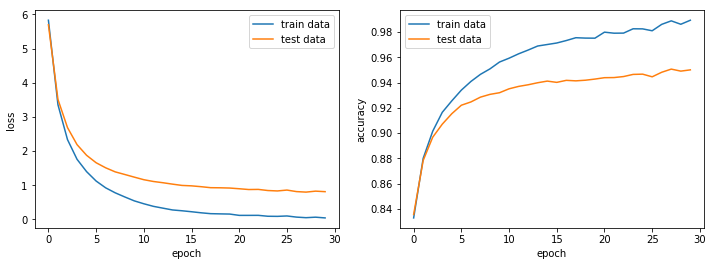

訓練集最高的準確率為0.9893833333333333，出現在epoch 29
驗證集最高的準確率為0.9507，出現在epoch 27


In [42]:
get_plots(loss_train_list_1,acc_train_list_1,loss_test_list_1,acc_test_list_1)

# graph_2的訓練

In [45]:
loss_train_list_2,acc_train_list_2,loss_test_list_2,acc_test_list_2 = run_training(img_train,
                             label_train,
                             img_test,
                             label_test,
                             sess,
                             batch_size=128,
                             epochs=30,
                             dropout_ratio=0.5                                            
                             )   

訓練集 損失值 =  1.1016426215025927
訓練集 準確率 =  0.9419166666666666
驗證集 損失值 =  1.1871218688526664
驗證集 準確率 =  0.9371
訓練集 損失值 =  0.45561441181163087
訓練集 準確率 =  0.9609333333333333
驗證集 損失值 =  0.6149194561848704
驗證集 準確率 =  0.9511
訓練集 損失值 =  0.23638332973373732
訓練集 準確率 =  0.9703
驗證集 損失值 =  0.41540317761833273
驗證集 準確率 =  0.955
訓練集 損失值 =  0.14746411301726564
訓練集 準確率 =  0.97565
驗證集 損失值 =  0.32054199578890835
驗證集 準確率 =  0.9588
訓練集 損失值 =  0.10211330891055898
訓練集 準確率 =  0.9799833333333333
驗證集 損失值 =  0.27049612375356424
驗證集 準確率 =  0.9612
訓練集 損失值 =  0.07119427514774142
訓練集 準確率 =  0.9832833333333333
驗證集 損失值 =  0.23620878720949126
驗證集 準確率 =  0.9617
訓練集 損失值 =  0.05036423522039507
訓練集 準確率 =  0.9872666666666666
驗證集 損失值 =  0.21725378210483748
驗證集 準確率 =  0.9652
訓練集 損失值 =  0.03582073387311104
訓練集 準確率 =  0.9903833333333333
驗證集 損失值 =  0.1902697397771319
驗證集 準確率 =  0.9681
訓練集 損失值 =  0.028004754608212414
訓練集 準確率 =  0.9919166666666667
驗證集 損失值 =  0.18938544010162803
驗證集 準確率 =  0.9685
訓練集 損失值 =  0.02270784695629932
訓練集 準確

# graph_2的結果

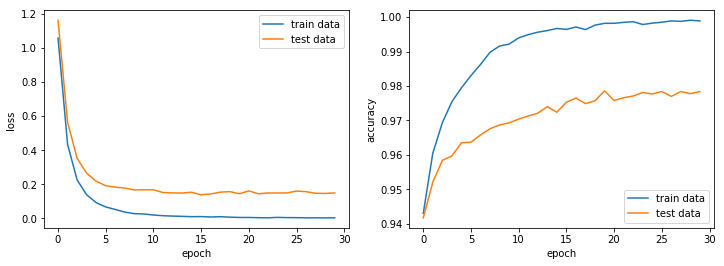

訓練集最高的準確率為0.9991，出現在epoch 28
驗證集最高的準確率為0.9786，出現在epoch 19


In [46]:
get_plots(loss_train_list,acc_train_list,loss_test_list,acc_test_list)